# DTSA-5510 Unsupervised Algorithms in Machine Learning - Final Project

In this project, I'm doing an analysis of bird songs based on the [bird song data set](https://www.kaggle.com/datasets/vinayshanbhag/bird-song-data-set) available on Kaggle. This data set consists of 5422 .wav audio files of bird song recordings from 5 different bird species. I will be using spectral audio processing libraries along with dimensionality reduction and clustering algorithms to build an unsupervised model for categorizing the bird songs by species.

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Exploratory Data Analysis

We'll begin by importing and inspecting the metadata from the data set.

In [57]:
metadata_df = pd.read_csv('./data/bird_songs_metadata.csv')
metadata_df

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav
1,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-1.wav
2,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-4.wav
3,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-5.wav
4,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-6.wav
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5417,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-8.wav
5418,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-10.wav
5419,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-14.wav
5420,11713,Cardinalis,cardinalis,NaN,Northern Cardinal,Chris Parrish,United States,"Sewanee, Franklin County, Tennessee",35.2176,-85.9220,580,song,//www.xeno-canto.org/11713,//creativecommons.org/licenses/by-nc-nd/2.5/,06:21,2007-03-31,NaN,11713-15.wav


Doing a count of how many samples there are of the different bird species, we see the 5 species are fairly well-balanced in this data set.

In [58]:
metadata_df['species'].value_counts()

species
melodia        1256
polyglottos    1182
cardinalis     1074
migratorius    1017
bewickii        893
Name: count, dtype: int64

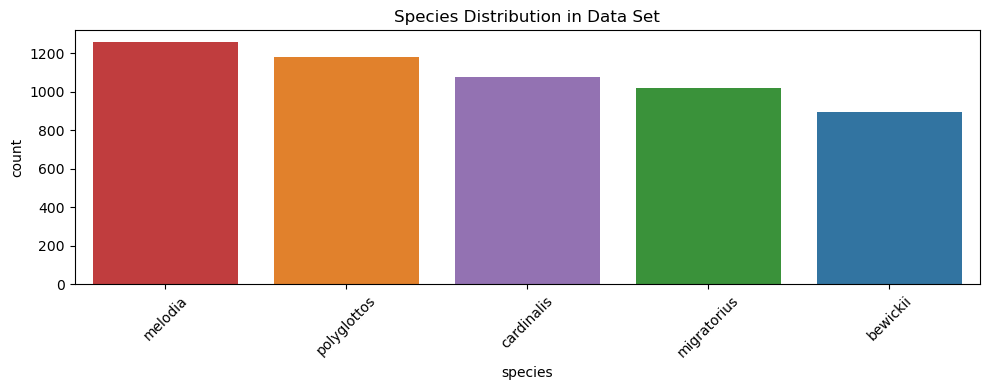

In [59]:
plt.figure(figsize=(10, 4))
sns.countplot(data=metadata_df, x="species", order=metadata_df['species'].value_counts().index, hue='species')
plt.title("Species Distribution in Data Set")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The recordings were made at quite a few different locations (304).

In [60]:
metadata_df['location'].nunique()

304

In [61]:
metadata_df.loc[metadata_df['filename'] == '557838-0.wav']

,id,genus,species,subspecies,name,recordist,country,location,latitude,longitude,altitude,sound_type,source_url,license,time,date,remarks,filename
0,557838,Thryomanes,bewickii,NaN,Bewick's Wren,Whitney Neufeld-Kaiser,United States,"Arlington, Snohomish County, Washington",48.0708,-122.1006,100,"adult, sex uncertain, song",//www.xeno-canto.org/557838,//creativecommons.org/licenses/by-nc-sa/4.0/,11:51,2020-03-14,"Recorded with Voice Record Pro on iPhone7, nor...",557838-0.wav


There are several locations where a disproportionate number of recordings were made.

In [62]:
metadata_df['location'].value_counts().head(20)

location
San Bernardino National Wildlife Refuge, Cochise County, Arizona              252
Hendrix Habitat - Fairview, Williamson County, Tennessee                      195
San Simon Cienega, Cochise County, Arizona                                     94
Sewanee, Franklin County, Tennessee                                            85
Knoxville, Tennessee                                                           74
Oso Flaco Lake, Nipomo, California                                             73
Bill Williams River NWR, Arizona                                               66
FR 42, Upper Cave Creek Canyon, Cochise County, Arizona                        57
Foothills Road, Cochise County, Arizona                                        56
Nome, Nome, Alaska                                                             54
Point Loma, San Diego, California                                              53
Stateline Road, Rodeo, New Mexico                                              46
Oxford,

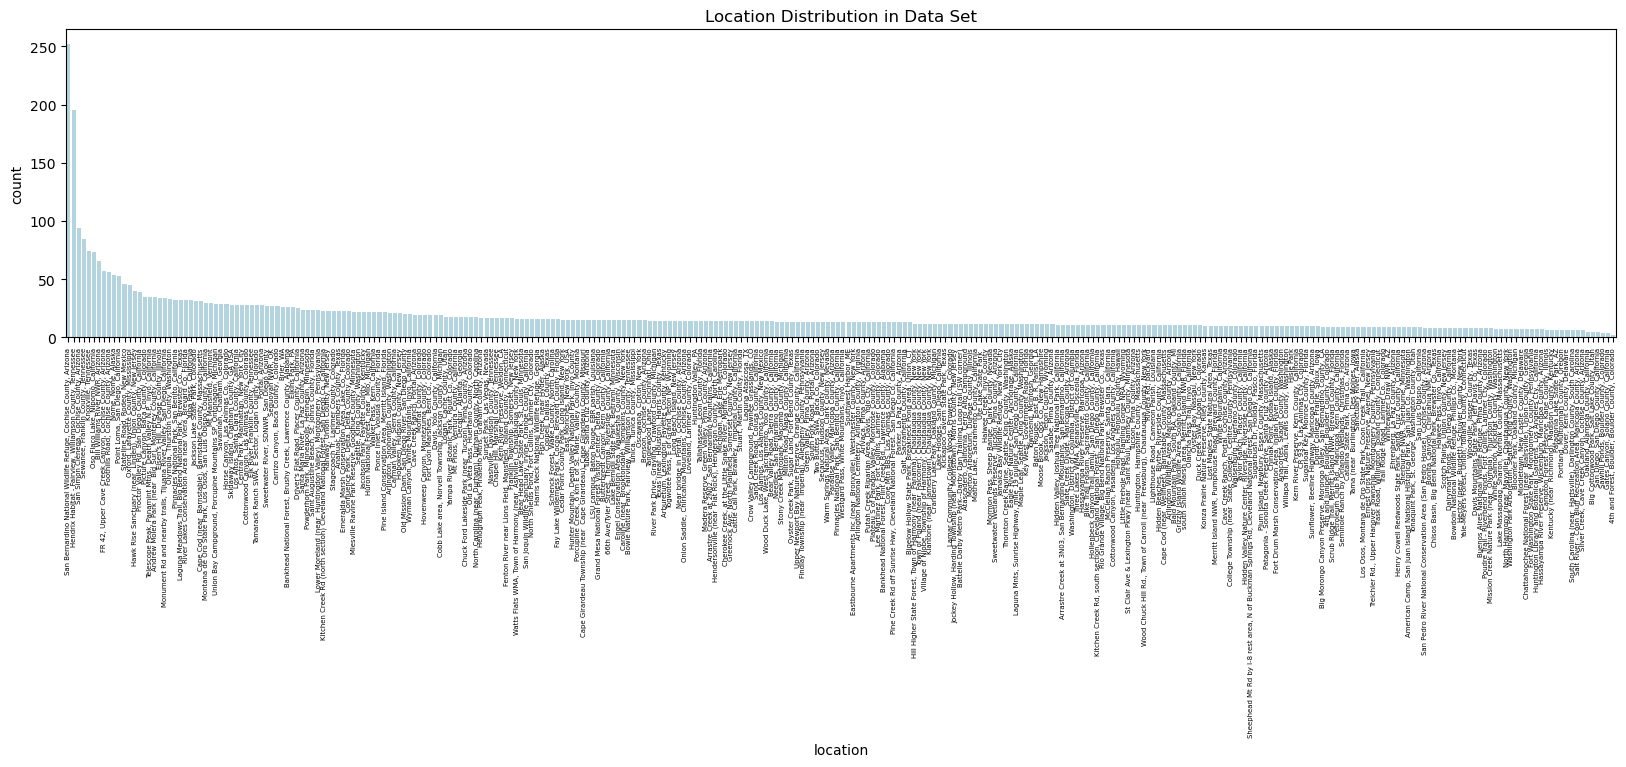

In [63]:
plt.figure(figsize=(20, 4))
sns.countplot(data=metadata_df, x="location", order=metadata_df['location'].value_counts().index, color='lightblue')
plt.title("Location Distribution in Data Set")
plt.xticks(rotation=90, fontsize=5)
plt.show()

Within the 5 species of birds are 28 subspecies.

In [64]:
metadata_df['subspecies'].nunique()

28

In [65]:
subspecies_counts = metadata_df.groupby(['species', 'subspecies']).size().reset_index(name='count')
subspecies_counts

,species,subspecies,count
0,bewickii,calophonus,40
1,bewickii,charienturus,58
2,bewickii,charienturus?,24
3,bewickii,eremophilus,135
4,cardinalis,cardinalis,52
5,cardinalis,floridanus,61
6,cardinalis,superbus,70
7,melodia,atlantica,14
8,melodia,clementae?,9
9,melodia,fallax,272


Seeing how the counts of subspecies are distributed amongst species, melodia has disproportionately more subspecies than the rest.

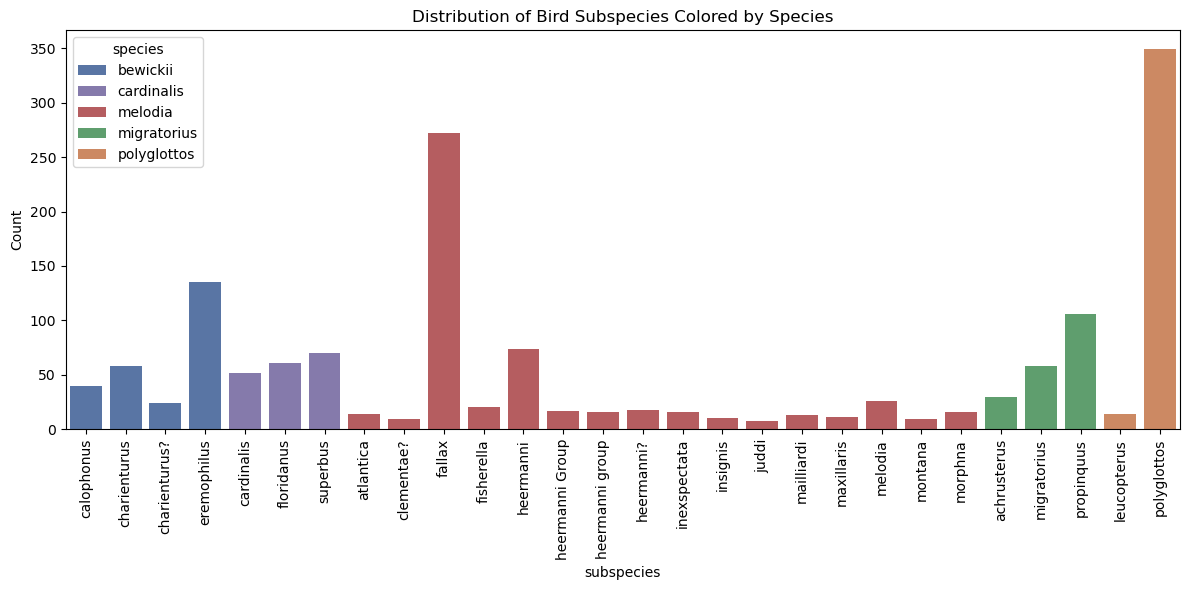

In [66]:
default_colors = sns.color_palette('deep')
species_palette = {
    'melodia': default_colors[3],
    'polyglottos': default_colors[1],
    'cardinalis': default_colors[4],
    'migratorius': default_colors[2],
    'bewickii': default_colors[0]
}

plt.figure(figsize=(12, 6))
sns.barplot(data=subspecies_counts, x='subspecies', y='count', hue='species', dodge=False, palette=species_palette)
plt.xticks(rotation=90)
plt.title("Distribution of Bird Subspecies Colored by Species")
plt.xlabel("subspecies")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Audio Pre-Processing

Now we'll prepare to process the 5422 audio files for clustering analysis.

In [67]:
import os

wavfile_path = './data/wavfiles/'

wavfile_list = metadata_df['filename'].tolist()

In [68]:
len(wavfile_list)

5422

In [69]:
wavfile_list_files = [f for f in os.listdir(wavfile_path) if f.endswith('.wav')]
len(wavfile_list_files)

5422

To work with the audio recordings numerically, we'll need to convert each .wav file into a set of features that summarize its spectral content.
We'll use the [librosa.feature.mfcc](https://librosa.org/doc/main/generated/librosa.feature.mfcc.html) method from the [librosa](https://librosa.org/) audo processing library to extract [Mel-Frequency Cepstral Coefficients](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) (MFCCs) from each recording.

Before we convert the raw audio data into MFCCs, let's see what the full [spectrogram](https://en.wikipedia.org/wiki/Spectrogram)* looks like for the first bird song in the data set. Below is the spectrogram for a [Bewick's Wren](https://en.wikipedia.org/wiki/Bewick%27s_wren) song.

> *Note that the sample rate for these .wav files is 22100 frames per second. The spectral bandwidth for these files is approximately 11050 Hz (see [Shannon-Nyquist Sampling Theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)).

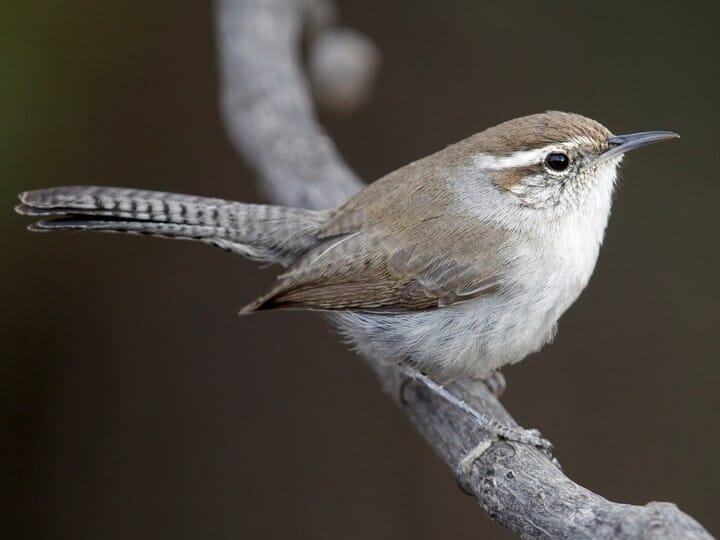

In [70]:
from IPython.display import Audio, Image, display

display(Image(filename='./images/Bewicks_Wren.jpg', width=300)) # source: https://www.allaboutbirds.org/guide/assets/photo/304473511-1280px.jpg

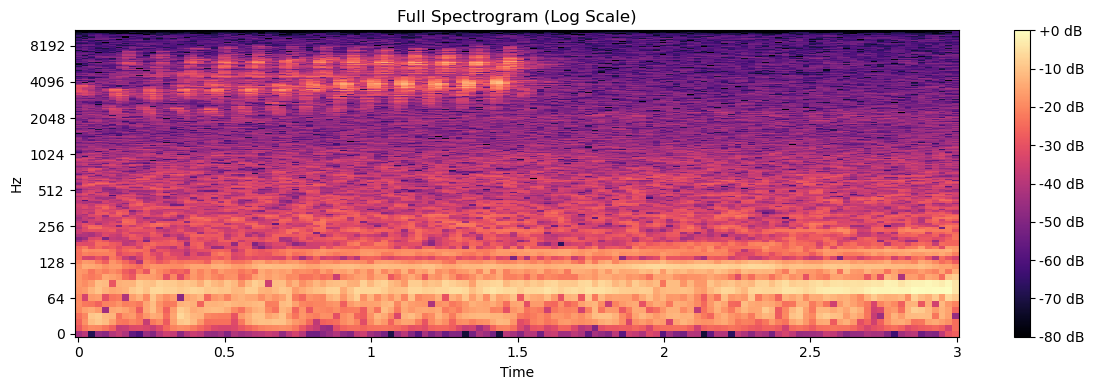

In [71]:
import librosa
import librosa.display

example_file = './example_audio/557838-0.wav'
y, sr = librosa.load(example_file, sr=22050)

plt.figure(figsize=(12, 4))
D = np.abs(librosa.stft(y))  # Compute short-time Fourier transform
DB = librosa.amplitude_to_db(D, ref=np.max)  # Convert to dB scale
librosa.display.specshow(DB, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Full Spectrogram (Log Scale)')
plt.tight_layout()
plt.show()

In [72]:
display(Audio(filename=example_file))

Now we'll convert the same example bird song into its MFCC components and view the spectrogram.

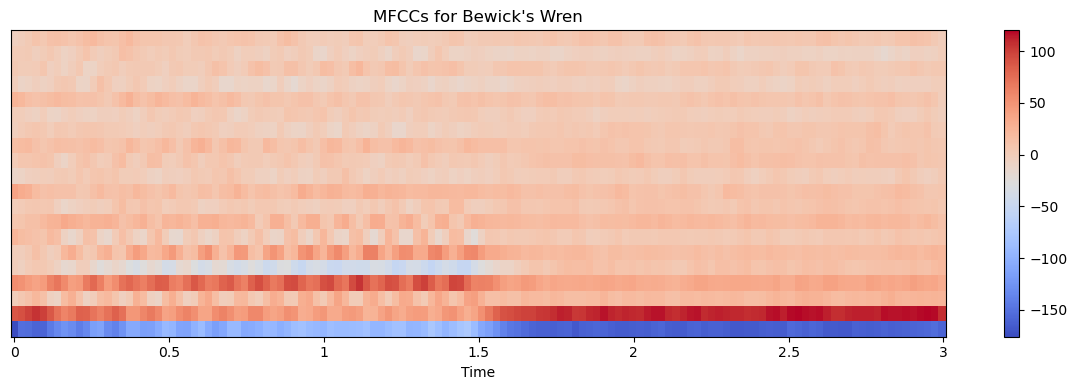

In [73]:
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title('MFCCs for Bewick\'s Wren')
plt.tight_layout()
plt.show()

We can pick out some visual similarities between the full frequency content of the original recording and the MFCC transform. We can also see how the 20 MFCC bands reduce the amount of information.

We can even listen to what the MFCC-transformed version sounds like played back as audio. There is some similarity to the original recording, and yet there is an obvious reduction in detail, as well as audible robotic "windowing" artifacts from the [Short-time Fourier Transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform) (STFT) frames.

In [74]:
y_inv = librosa.feature.inverse.mfcc_to_audio(mfccs, sr=sr)
display(Audio(y_inv, rate=sr))

### What are MFCCs?
Mel-Frequency Cepstral Coefficients (MFCCs) are used in audio analysis as a way of representing and generalizing about how the human ear perceives sound. They are essentially power coefficients for frequency bands in the auditory spectrum. By transforming an audio information matrix of size 20000 X T (20000 hz by T timeframes) into an MFCC matrix (20 bands by T timeframes), we drammatically reduce the amount of data needed to represent auditory signals in the frequency domain ([human hearing](https://en.wikipedia.org/wiki/Hearing_range) is generally in the range of 20 - 20000 Hz). In the case of the bird recordings in this data set, we are reducing matrices of size 11050 X T to 20 X T.

- MFCCs are computed by first taking the short-time Fourier transform (STFT) to represent the audio as a spectrogram.
- The power spectrum is then mapped onto the Mel scale, which is a perceptual scale of frequency bands.
- Finally, a logarithm and discrete cosine transform are applied to compact the information into the desired number of coefficients.


In the code below:
1) We extract 20 MFCCs per time frame for each audio recording.
2) Then we further reduce the data size by collapsing the MFCCs into two feature vectors by computing:
    - The mean power value of each MFCC across time
    - The standard deviation of each MFCC power value across time  

This results in a 40-dimensional feature vector (20 means + 20 standard deviations) per audio file.

In [ ]:
features = []
for filename in wavfile_list:
    y, sr = librosa.load(os.path.join(wavfile_path, filename), sr=22050)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    feature_vector = np.hstack([np.mean(mfccs, axis=1), np.std(mfccs, axis=1)])
    features.append(feature_vector)

feature_df = pd.DataFrame(features)

## Dimensionality Reduction with PCA

After extracting a 40-dimensional feature vector for each bird song, the next step is to visualize and model the data.
We apply Principal Component Analysis (PCA) to reduce the dimensionality to 20 components.


- PCA identifies the directions (principal components) that capture the most variance across the dataset.
- We project the 40D feature vectors onto the top 2 principal components for easier visualization and clustering.
The resulting 2D representation preserves as much of the original data structure as possible while simplifying the analysis.

In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20, random_state=42)
reduced_features = pca.fit_transform(feature_df)


## Clustering Bird Songs with K-Means

To find natural groupings in the bird songs without using the species labels, we apply K-Means clustering to the 2D PCA-reduced features.
- K-Means partitions the data into a specified number of clusters (in this case, 5 clusters, corresponding to the 5 bird species).
- The algorithm iteratively assigns points to the nearest cluster centroid and updates the centroids until convergence.
After clustering, we can visualize the cluster assignments and compare them to the true bird species to evaluate how well the unsupervised model captures the species distinctions.

In [78]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_features)
print(cluster_labels)

cluster_labels


[3 3 3 ... 4 1 4]


array([3, 3, 3, ..., 4, 1, 4], shape=(5422,), dtype=int32)

In [79]:
cluster_labels

array([3, 3, 3, ..., 4, 1, 4], shape=(5422,), dtype=int32)

In [80]:
from collections import Counter
print(Counter(cluster_labels))

Counter({np.int32(1): 1453, np.int32(4): 1314, np.int32(3): 991, np.int32(0): 894, np.int32(2): 770})


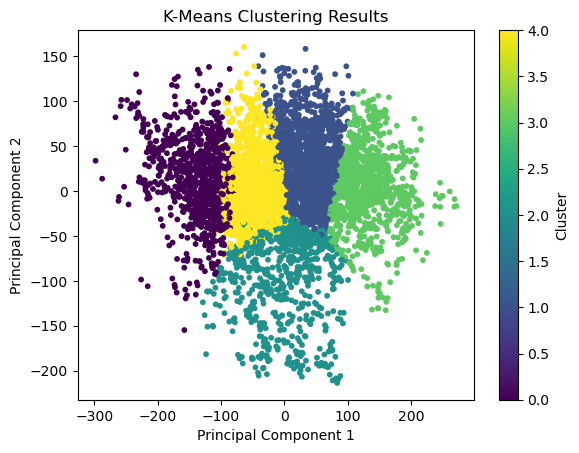

In [81]:
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', s=10)
plt.title("K-Means Clustering Results")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [82]:
from sklearn.metrics import accuracy_score

# Assuming `cluster_labels` contains the K-Means cluster labels
# and `metadata_df['species']` contains the ground truth species labels

# Create a DataFrame to combine cluster labels and ground truth labels
comparison_df = pd.DataFrame({
    'cluster': cluster_labels,
    'species': metadata_df['species']
})

# Map each cluster to the most common species (majority vote)
cluster_to_species = comparison_df.groupby('cluster')['species'].agg(lambda x: x.value_counts().idxmax())

# Create a new array to store predicted species labels
predicted_species = np.empty_like(cluster_labels, dtype=object)

# Map each cluster to the most common species (majority vote)
for cluster, species in cluster_to_species.items():
    predicted_species[cluster_labels == cluster] = species

# Calculate accuracy
accuracy = accuracy_score(metadata_df['species'], predicted_species)
print(f"Clustering Accuracy: {accuracy:.2f}")


Clustering Accuracy: 0.29


In [83]:
cluster_to_species

cluster
0    polyglottos
1     cardinalis
2        melodia
3        melodia
4       bewickii
Name: species, dtype: object

In [ ]:
features = []

for filename in wavfile_list:
    y, sr = librosa.load(os.path.join(wavfile_path, filename), sr=22050)
    
    # MFCCs
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_std = np.std(mfccs, axis=1)
    
    # Delta MFCCs (first derivatives)
    delta_mfccs = librosa.feature.delta(mfccs)
    delta_mfccs_mean = np.mean(delta_mfccs, axis=1)
    delta_mfccs_std = np.std(delta_mfccs, axis=1)
    
    # Delta-Delta MFCCs (second derivatives)
    delta2_mfccs = librosa.feature.delta(mfccs, order=2)
    delta2_mfccs_mean = np.mean(delta2_mfccs, axis=1)
    delta2_mfccs_std = np.std(delta2_mfccs, axis=1)
    
    # Spectral Features
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

    # Chroma Features
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_mean = np.mean(chroma, axis=1)
    chroma_std = np.std(chroma, axis=1)

    # Take mean and std of spectral features (over time axis)
    spectral_features = np.hstack([
        np.mean(spectral_centroid), np.std(spectral_centroid),
        np.mean(spectral_bandwidth), np.std(spectral_bandwidth),
        np.mean(spectral_rolloff), np.std(spectral_rolloff),
        np.mean(zero_crossing_rate), np.std(zero_crossing_rate)
    ])
    
    # Combine All Features into Single Vector
    feature_vector = np.hstack([
        mfccs_mean, mfccs_std,
        delta_mfccs_mean, delta_mfccs_std,
        delta2_mfccs_mean, delta2_mfccs_std,
        spectral_features,
        chroma_mean, chroma_std
    ])
    
    features.append(feature_vector)

# Create DataFrame
feature_df = pd.DataFrame(features)

In [85]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(feature_df)

In [32]:
# pca = PCA(n_components=20, random_state=42)
# reduced_features = pca.fit_transform(scaled_features)

In [33]:
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, perplexity=30, random_state=42)
# reduced_features = tsne.fit_transform(scaled_features)

In [86]:
import umap

umap_model = umap.UMAP(n_components=20, random_state=42)
reduced_features = umap_model.fit_transform(scaled_features)


In [87]:
kmeans = KMeans(n_clusters=5, random_state=42)
cluster_labels = kmeans.fit_predict(reduced_features)
print(cluster_labels)

cluster_labels

[0 0 0 ... 3 3 3]


array([0, 0, 0, ..., 3, 3, 3], shape=(5422,), dtype=int32)

In [88]:
comparison_df = pd.DataFrame({
    'cluster': cluster_labels,
    'species': metadata_df['species']
})

cluster_to_species = comparison_df.groupby('cluster')['species'].agg(lambda x: x.value_counts().idxmax())

predicted_species = np.empty_like(cluster_labels, dtype=object)

# Map each cluster to the most common species (majority vote)
for cluster, species in cluster_to_species.items():
    predicted_species[cluster_labels == cluster] = species

accuracy = accuracy_score(metadata_df['species'], predicted_species)
print(f"Clustering Accuracy: {accuracy:.2f}")

Clustering Accuracy: 0.44


In [89]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=50, min_samples=5)
cluster_labels = clusterer.fit_predict(reduced_features)

# cluster_labels now contains the cluster assignment for each point
# (-1 means 'noise' that doesn't fit into any cluster)


In [90]:
# Filter out noise points
mask = cluster_labels != -1
comparison_df = pd.DataFrame({
    'cluster': cluster_labels[mask],
    'species': metadata_df['species'][mask]
})

# Majority vote mapping
cluster_to_species = comparison_df.groupby('cluster')['species'].agg(lambda x: x.value_counts().idxmax())

predicted_species = np.empty_like(cluster_labels, dtype=object)
for cluster, species in cluster_to_species.items():
    predicted_species[cluster_labels == cluster] = species

# Calculate accuracy (only on non-noise points)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(metadata_df['species'][mask], predicted_species[mask])
print(f"HDBSCAN Clustering Accuracy (on clustered points): {accuracy:.2f}")


HDBSCAN Clustering Accuracy (on clustered points): 0.57


Best accuracy with KMeans - 44%. Best accuracy with HDBSCAN - 57%.

In [91]:
best_accuracy = 0
best_params = {}

# Grid of hyperparameters
n_neighbors_list = [5, 15, 30]
min_dist_list = [0.1, 0.3, 0.5]
min_cluster_size_list = [30, 50, 70]
min_samples_list = [5, 10, 20]

for n_neighbors in n_neighbors_list:
    for min_dist in min_dist_list:

        umap_model = umap.UMAP(
            n_components=20, 
            n_neighbors=n_neighbors, 
            min_dist=min_dist, 
            random_state=42
        )
        reduced_features = umap_model.fit_transform(scaled_features)
        
        for min_cluster_size in min_cluster_size_list:
            for min_samples in min_samples_list:

                clusterer = hdbscan.HDBSCAN(
                    min_cluster_size=min_cluster_size,
                    min_samples=min_samples
                )
                cluster_labels = clusterer.fit_predict(reduced_features)

                # Filter out noise
                mask = cluster_labels != -1
                if np.sum(mask) == 0:
                    continue  # skip if no points clustered

                # Majority vote mapping
                comparison_df = pd.DataFrame({
                    'cluster': cluster_labels[mask],
                    'species': metadata_df['species'][mask]
                })
                cluster_to_species = comparison_df.groupby('cluster')['species'].agg(lambda x: x.value_counts().idxmax())

                predicted_species = np.empty_like(cluster_labels, dtype=object)
                for cluster, species in cluster_to_species.items():
                    predicted_species[cluster_labels == cluster] = species


                accuracy = accuracy_score(metadata_df['species'][mask], predicted_species[mask])

                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_params = {
                        'n_neighbors': n_neighbors,
                        'min_dist': min_dist,
                        'min_cluster_size': min_cluster_size,
                        'min_samples': min_samples
                    }

print("Best Accuracy:", best_accuracy)
print("Best Params:", best_params)

Best Accuracy: 0.612467018469657
Best Params: {'n_neighbors': 5, 'min_dist': 0.1, 'min_cluster_size': 30, 'min_samples': 5}


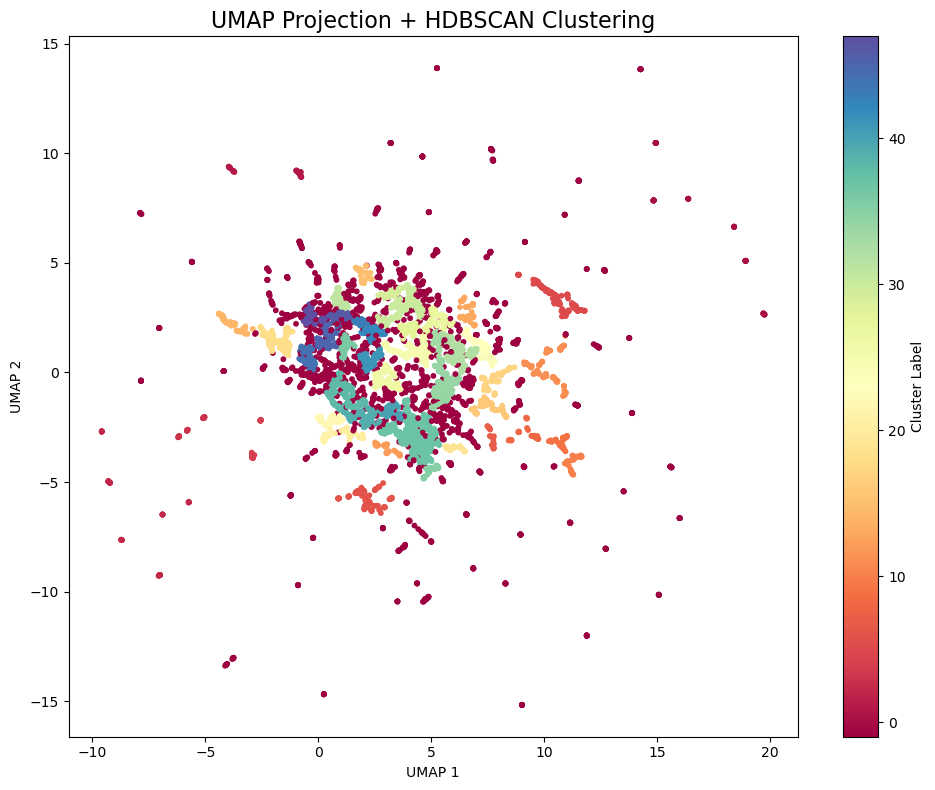

In [92]:
import matplotlib.pyplot as plt

# Re-run the best UMAP model
umap_model = umap.UMAP(
    n_components=2,         # <-- for 2D visualization!
    n_neighbors=5,
    min_dist=0.1,
    random_state=42
)
reduced_2d = umap_model.fit_transform(scaled_features)

# Re-run HDBSCAN with best params
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,
    min_samples=5
)
cluster_labels = clusterer.fit_predict(reduced_2d)

plt.figure(figsize=(10, 8))
plt.scatter(
    reduced_2d[:, 0], 
    reduced_2d[:, 1], 
    c=cluster_labels, 
    cmap='Spectral', 
    s=10
)
plt.colorbar(label='Cluster Label')
plt.title('UMAP Projection + HDBSCAN Clustering', fontsize=16)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.tight_layout()
plt.show()


In [93]:
cluster_labels

array([ 3,  3,  3, ..., -1, -1, -1], shape=(5422,))

In [94]:
np.unique(cluster_labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

In [95]:
cluster_to_species

cluster
0    polyglottos
1    migratorius
2    migratorius
Name: species, dtype: object

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Only keep non-noise points
mask = cluster_labels != -1

true_species = metadata_df['species'].values[mask]

predicted_species = np.array([cluster_to_species[c] for c in cluster_labels[mask]])

cm = confusion_matrix(true_species, predicted_species)

labels = sorted(metadata_df['species'].unique())

fig, ax = plt.subplots(figsize=(12, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', ax=ax, xticks_rotation=45)
plt.title('Confusion Matrix: True Species vs Predicted Species')
plt.xlabel('Predicted Species')
plt.ylabel('True Species')
plt.tight_layout()
plt.show()

